<a href="https://www.kaggle.com/code/shreeyashah/spaceshiptitanicprediction?scriptVersionId=284018103" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [149]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


## Importing the Libraries

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Data

In [151]:
df_train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [152]:
df_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [153]:
PassengerId = df_test['PassengerId']

## Exploratory Data Analysis

In [154]:
df_train.shape

(8693, 14)

In [155]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [156]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


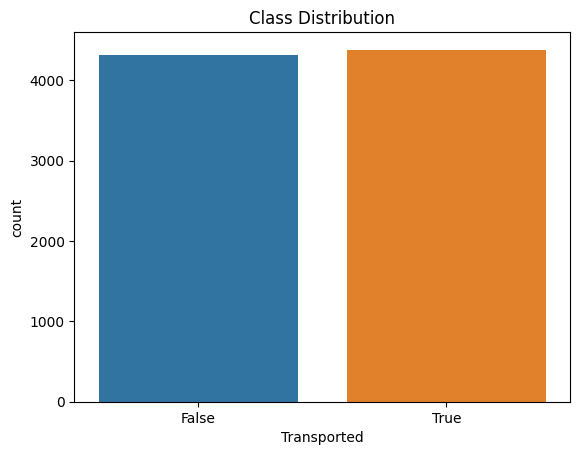

In [157]:
sns.countplot(x=df_train['Transported'])
plt.title('Class Distribution')
plt.show()

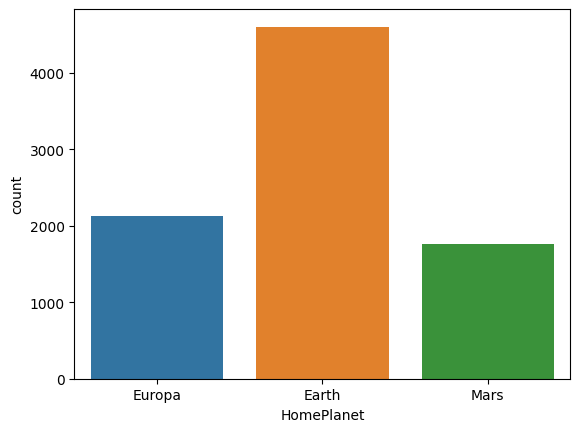

In [158]:
sns.countplot(x=df_train['HomePlanet'])
plt.show()

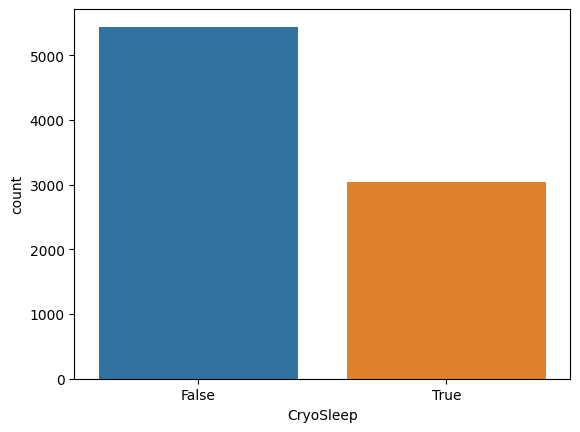

In [159]:
sns.countplot(x=df_train['CryoSleep'])
plt.show()

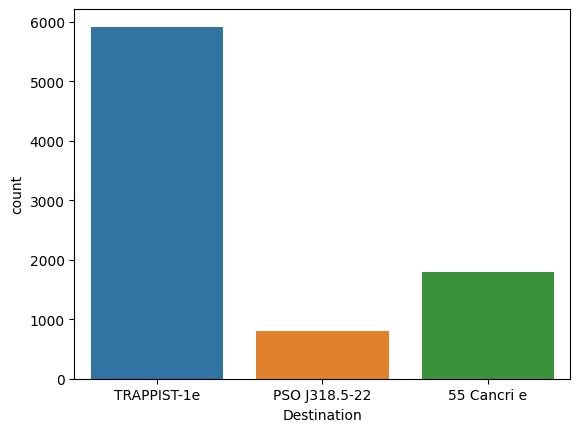

In [160]:
sns.countplot(x=df_train['Destination'])
plt.show()

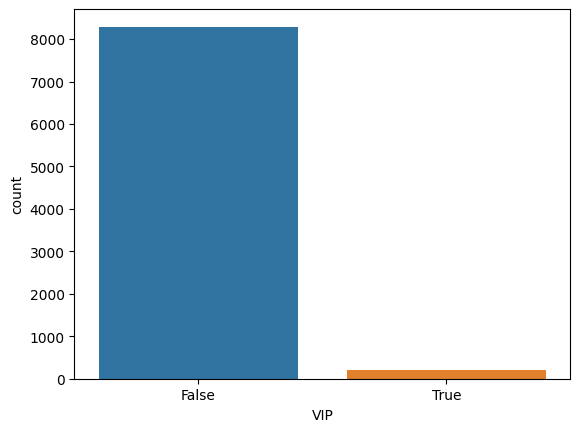

In [161]:
sns.countplot(x=df_train['VIP'])
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


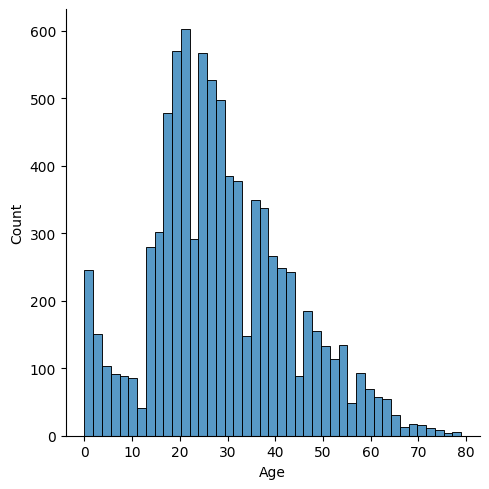

In [162]:
sns.displot(x=df_train['Age'])
plt.show()

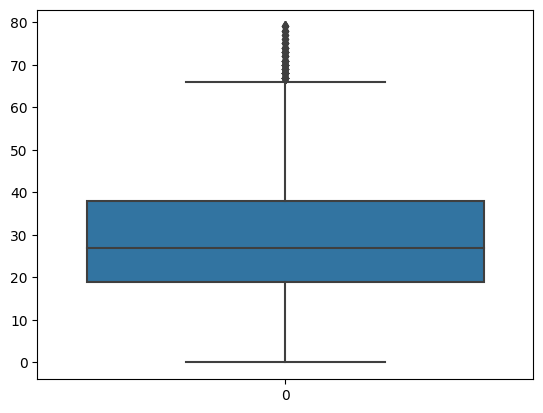

In [163]:
sns.boxplot(data=df_train['Age'])
plt.show()

In [164]:
y = df_train['Transported']

## Handling Missing Values

In [165]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [166]:
#Spending columns missing mostly means passengers had 0 expenditure
df_train = df_train.fillna({'RoomService':0, 'FoodCourt':0, 'ShoppingMall':0, 'Spa':0, 'VRDeck':0})
df_test = df_test.fillna({'RoomService':0, 'FoodCourt':0, 'ShoppingMall':0, 'Spa':0, 'VRDeck':0})

In [167]:
df_train["TotalSpend"] = (
    df_train["RoomService"] + df_train["FoodCourt"] +
    df_train["ShoppingMall"] + df_train["Spa"] +
    df_train["VRDeck"]
)
df_test["TotalSpend"] = (
    df_test["RoomService"] + df_test["FoodCourt"] +
    df_test["ShoppingMall"] + df_test["Spa"] +
    df_test["VRDeck"]
)

In [168]:
#VIP strongly imbalanced hence safe to fill with False
df_train["VIP"] = df_train["VIP"].fillna(False)
df_test["VIP"] = df_test["VIP"].fillna(False)

/tmp/ipykernel_47/16654876.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train["VIP"] = df_train["VIP"].fillna(False)
/tmp/ipykernel_47/16654876.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test["VIP"] = df_test["VIP"].fillna(False)


In [169]:
#Filling missing values in Age with median age
med_age = df_train["Age"].median()
df_train["Age"] = df_train["Age"].fillna(med_age)
df_test["Age"] = df_test["Age"].fillna(med_age)

In [170]:
"""
"PassengerId" looks like: "0001_01"
0001 = group/family
01 = number inside group
Impute missing values per group, because groups often travel together."""
df_train["Group"] = df_train["PassengerId"].apply(lambda x: int(x.split("_")[0]))
df_test["Group"] = df_test["PassengerId"].apply(lambda x: int(x.split("_")[0]))

In [171]:
df_train[["Deck", "CabinNum", "Side"]] = df_train["Cabin"].str.split("/", expand=True)
df_test[["Deck", "CabinNum", "Side"]] = df_test["Cabin"].str.split("/", expand=True)

In [172]:
cat_cols = ["HomePlanet", "CryoSleep", "Destination", "Deck", "Side"]
for col in cat_cols:
    df_train[col] = df_train.groupby("Group")[col].transform(
            lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x
        )
    df_test[col] = df_test.groupby("Group")[col].transform(
            lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x
        )
for col in cat_cols:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])
    df_test[col] = df_test[col].fillna(df_test[col].mode()[0])

/tmp/ipykernel_47/3120042300.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x
/tmp/ipykernel_47/3120042300.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x
/tmp/ipykernel_47/3120042300.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('futu

In [173]:
df_train.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpend,Group,Deck,CabinNum,Side
3892,4172_04,Mars,False,F/856/P,55 Cancri e,24.0,False,1363.0,0.0,50.0,0.0,0.0,Puffs Facle,False,1413.0,4172,F,856,P
4636,4937_01,Earth,False,G/803/S,TRAPPIST-1e,34.0,False,1242.0,444.0,0.0,22.0,0.0,Besse Simonddler,False,1708.0,4937,G,803,S
7109,7577_01,Earth,False,E/502/S,PSO J318.5-22,14.0,False,80.0,130.0,0.0,1323.0,0.0,Gera Beston,False,1533.0,7577,E,502,S
5859,6205_01,Mars,False,D/189/S,TRAPPIST-1e,27.0,True,55.0,0.0,50.0,1849.0,1.0,Spikes Sulie,False,1955.0,6205,D,189,S
3851,4128_01,Mars,False,F/846/P,TRAPPIST-1e,54.0,True,111.0,0.0,1144.0,8.0,23.0,Ors Pare,False,1286.0,4128,F,846,P


In [174]:
#Drop the name column - does not affect the class
df_train.drop(columns=['Name', 'Cabin', 'PassengerId', 'CabinNum'], inplace=True)
df_test.drop(columns=['Name', 'Cabin', 'PassengerId', 'CabinNum'], inplace=True)

In [175]:
df_train.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
TotalSpend      0
Group           0
Deck            0
Side            0
dtype: int64

## Encoding Categorical Variables

In [176]:
df_train.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'TotalSpend', 'Group', 'Deck', 'Side'],
      dtype='object')

In [177]:
from sklearn.preprocessing import LabelEncoder
cols = ['CryoSleep','VIP']

for col in cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])

In [178]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [179]:
X = df_train.drop(columns = ['Transported'])

In [180]:
X

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpend,Group,Deck,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,B,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,736.0,2,F,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,10383.0,3,A,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,5176.0,3,A,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1091.0,4,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,8536.0,9276,A,P
8689,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0.0,9278,G,S
8690,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1873.0,9279,G,S
8691,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,4637.0,9280,E,S


In [181]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cols = ['HomePlanet', 'Destination', 'Deck', 'Side']

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore',sparse=False), cols)
    ],
    remainder='passthrough'
)

X_trans = ct.fit_transform(X)
feature_names = ct.get_feature_names_out()
X = pd.DataFrame(X_trans, columns=feature_names, index=X.index)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [182]:
X

,encoder__HomePlanet_Earth,encoder__HomePlanet_Europa,encoder__HomePlanet_Mars,encoder__Destination_55 Cancri e,encoder__Destination_PSO J318.5-22,encoder__Destination_TRAPPIST-1e,encoder__Deck_A,encoder__Deck_B,encoder__Deck_C,encoder__Deck_D,...,remainder__CryoSleep,remainder__Age,remainder__VIP,remainder__RoomService,remainder__FoodCourt,remainder__ShoppingMall,remainder__Spa,remainder__VRDeck,remainder__TotalSpend,remainder__Group
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,736.0,2.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,10383.0,3.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,5176.0,3.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1091.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,8536.0,9276.0
8689,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9278.0
8690,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1873.0,9279.0
8691,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,4637.0,9280.0


In [183]:
df_test_trans=ct.transform(df_test)
df_test = pd.DataFrame(df_test_trans, columns=feature_names, index=df_test.index)

In [184]:
df_test

,encoder__HomePlanet_Earth,encoder__HomePlanet_Europa,encoder__HomePlanet_Mars,encoder__Destination_55 Cancri e,encoder__Destination_PSO J318.5-22,encoder__Destination_TRAPPIST-1e,encoder__Deck_A,encoder__Deck_B,encoder__Deck_C,encoder__Deck_D,...,remainder__CryoSleep,remainder__Age,remainder__VIP,remainder__RoomService,remainder__FoodCourt,remainder__ShoppingMall,remainder__Spa,remainder__VRDeck,remainder__TotalSpend,remainder__Group
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,2832.0,18.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,7418.0,21.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,645.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9266.0
4273,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,42.0,0.0,0.0,847.0,17.0,10.0,144.0,1018.0,9269.0
4274,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9271.0
4275,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,27.0,0.0,0.0,2680.0,0.0,0.0,523.0,3203.0,9273.0


In [185]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

cbc = CatBoostClassifier(random_state=42, verbose=0)   
cat_features = ['HomePlanet','Destination','Deck','Side']
X_cat = df_train.drop(columns='Transported')
param_grid = {
    'iterations': [300, 600],         
    'learning_rate': [0.03, 0.08]
}

gs = GridSearchCV(estimator=cbc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
gs.fit(X_cat, y, cat_features =cat_features)                    
cbc = gs.best_estimator_
print("best params:", gs.best_params_)
print("best CV score:", gs.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
best params: {'iterations': 300, 'learning_rate': 0.03}
best CV score: 0.7518747795612863


In [186]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1,
    verbosity=0
)

param_grid = {
    'n_estimators': [200, 400, 600],
    'learning_rate': [0.01, 0.03, 0.05],
}

gs = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

gs.fit(X, y)

xgb_clf = gs.best_estimator_
print("best params:", gs.best_params_)
print("best CV score:", gs.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
best params: {'learning_rate': 0.01, 'n_estimators': 200}
best CV score: 0.7685530816422279


In [187]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV 
rf=RandomForestClassifier(random_state=42) 

param_grid = {'n_estimators':[100,150,200], 
              'criterion':['entropy', 'gini']} 
gs = GridSearchCV(estimator=rf, param_grid = param_grid,cv=5, verbose = True) 
gs.fit(X, y) 
rf = gs.best_estimator_ 
print(gs.best_estimator_) 
print(gs.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
RandomForestClassifier(n_estimators=150, random_state=42)
0.7787916285896357


In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
lr = LogisticRegression(max_iter = 10000)

#score = cross_val_score(lr,X,y,cv=5, verbose=True, n_jobs=-1)
#print(score)

In [189]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
svc = SVC()
#score = cross_val_score(svc,X,y,cv=5, verbose=True, n_jobs=-1)
#print(score)

In [190]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators = [('cbc', cbc),('lr', lr),('svc', svc), ('xgb', xgb_clf), ('rf', rf)], voting='hard')
vc.fit(X,y)


VotingClassifier(estimators=[('cbc',
                              <catboost.core.CatBoostClassifier object at 0x7e07fe388e10>),
                             ('lr', LogisticRegression(max_iter=10000)),
                             ('svc', SVC()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval...
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('rf',
                              RandomForestClassifier(n_estimators=150,
                                                     random_state=42))])

In [191]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(vc,X,y,cv=5, verbose=True, n_jobs=-1)
print(score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[0.74123059 0.75618171 0.79930995 0.81300345 0.78423475]


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.0s finished


In [192]:
y_pred = vc.predict(df_test)
y_pred_bool = np.where(y_pred == 1, 'True', 'False')

In [193]:
results = pd.DataFrame({'PassengerId':PassengerId,'Transported':y_pred_bool})
print(results)
results.to_csv('submission.csv', index=False)

     PassengerId Transported
0        0013_01        True
1        0018_01       False
2        0019_01        True
3        0021_01        True
4        0023_01        True
...          ...         ...
4272     9266_02        True
4273     9269_01        True
4274     9271_01        True
4275     9273_01        True
4276     9277_01        True

[4277 rows x 2 columns]
